GOALS
1. Build an AlphaVantage API class for getting stock data.
2. Build an SQL Repository class for data storage.
3. Calculate and compare returns for two companies.

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from data import AlphaVantageAPI
from data import SQLRepository

In [21]:
# Create instance of alphavantahge API
av = AlphaVantageAPI()
print("av type:", type(av))

av type: <class 'data.AlphaVantageAPI'>


AlphaVantageAPI: Get Daily Method

In [22]:
# Fetch stock data from 'Airbnb' company
ticker = "TSLA"
df_tesla = av.get_daily(ticker=ticker)

# Does 'get daily' method retutn a dataframe
assert isinstance(df_tesla, pd.DataFrame)

# Does dataframe have 5 columns
assert df_tesla.shape[1] == 5

# Does a dataframe have a datetime index
assert isinstance(df_tesla.index, pd.DatetimeIndex)

# Is the index name "date"
assert df_tesla.index.name == "date"

# Does Dataframe have correct column names
assert df_tesla.columns.to_list() == [' open', ' high', ' low', ' close', ' volume']



SQL Repository Class:
Connection to Database

In [23]:

connection = sqlite3.connect("/home/denis/Stock-Data/sqlite.db", check_same_thread=False)
print("connection type:", type(connection))

connection type: <class 'sqlite3.Connection'>


SQLRepository Class: Writting Tests

In [24]:
# Import class definition
from data import SQLRepository

# Create an instance of class
repo = SQLRepository(connection=connection)

# Does 'repo' have a connection attribute
assert hasattr(repo, "connection")

# Is the attribute connection a sqlite connection
assert isinstance(repo.connection, sqlite3.Connection)

In [25]:
print(dir(repo))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'connection', 'insert_table', 'read_table']


In [26]:
response = repo.insert_table(table_name=ticker, records=df_tesla, if_exists="replace")

# Does your response return a dictionary
assert isinstance(response, dict)


Querry SQL Database

In [27]:
pip install ipython-sql


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
# Load the SQL extension
%load_ext sql

# Connect to your SQLite database
%sql sqlite:////home/denis/Stock-Data/sqlite.db


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [29]:
%%sql
SELECT *
FROM "TSLA"
LIMIT 5

 * sqlite:////home/denis/Stock-Data/sqlite.db
Done.


date,open,high,low,close,volume
2024-10-02 00:00:00,247.55,251.1585,241.5,249.02,93983930.0
2024-10-01 00:00:00,262.67,263.98,248.53,258.02,87397613.0
2024-09-30 00:00:00,259.04,264.86,255.77,261.63,80873381.0
2024-09-27 00:00:00,257.375,260.6999,254.12,260.46,70988067.0
2024-09-26 00:00:00,260.6,261.75,251.53,254.22,67142193.0


Read SQL data with pandas

In [30]:
# Define sql query as a string
sql_query = 'SELECT * FROM "TSLA"'

df_tesla_test = pd.read_sql(
    sql_query,
    con=connection, 
    parse_dates=["date"], 
    index_col="date"
)

df_tesla_test.head()

,open,high,low,close,volume
date,,,,,
2024-10-02,247.550,251.1585,241.50,249.02,93983930.0
2024-10-01,262.670,263.9800,248.53,258.02,87397613.0
2024-09-30,259.040,264.8600,255.77,261.63,80873381.0
2024-09-27,257.375,260.6999,254.12,260.46,70988067.0
2024-09-26,260.600,261.7500,251.53,254.22,67142193.0


SQLRepository: Read Table Method

In [31]:
df_tesla = repo.read_table(table_name="TSLA", limit=2500)
df_tesla.head()

,open,high,low,close,volume
date,,,,,
2024-10-02,247.550,251.1585,241.50,249.02,93983930.0
2024-10-01,262.670,263.9800,248.53,258.02,87397613.0
2024-09-30,259.040,264.8600,255.77,261.63,80873381.0
2024-09-27,257.375,260.6999,254.12,260.46,70988067.0
2024-09-26,260.600,261.7500,251.53,254.22,67142193.0


Comparing Stock Returns

Insert Apple Inc Stock Data into Database

In [32]:
ticker = "AAPL"

# Get Goldman ETF Gold data from av
apple_records = av.get_daily(ticker=ticker)

# Insert AIRBNB records into the database
repo.insert_table(table_name=ticker, records=apple_records, if_exists="replace")
response

{'transaction_successful': True, 'records_inserted': 3590}

Read Apple Inc Stock data from database

In [33]:
ticker = "AAPL"
df_apple = repo.read_table(table_name=ticker, limit=2500)
df_apple.head()

,open,high,low,close,volume
date,,,,,
2024-10-02,225.89,227.37,223.02,226.78,32880605.0
2024-10-01,229.52,229.65,223.74,226.21,63285048.0
2024-09-30,230.04,233.00,229.65,233.00,54793391.0
2024-09-27,228.46,229.52,227.30,227.79,34025967.0
2024-09-26,227.30,228.50,225.41,227.52,36636707.0


Plot Apple Inc Stock Closing Price

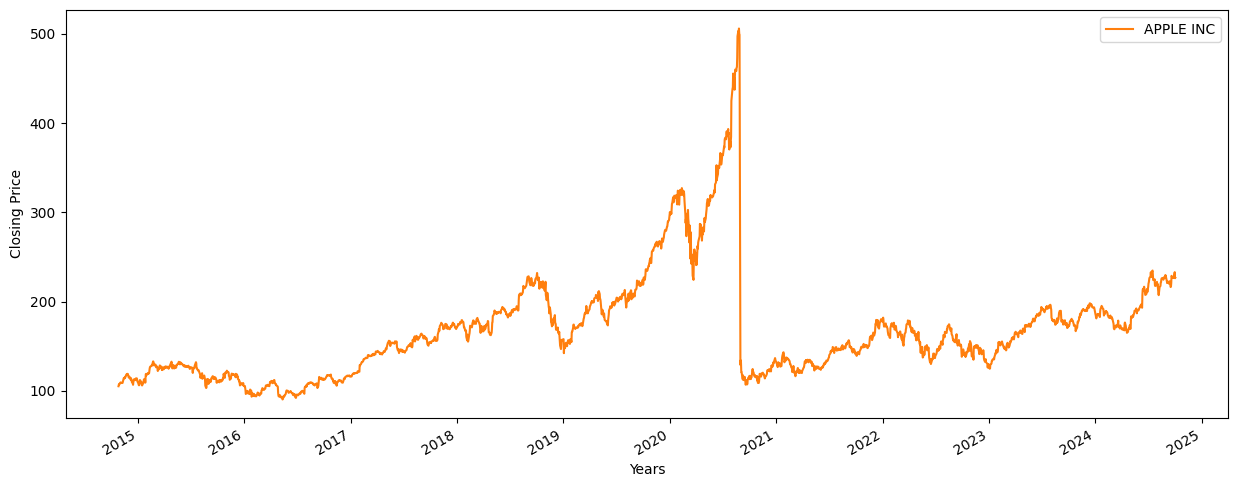

In [34]:
fig, ax = plt.subplots(figsize = (15, 6))

# Plot airbnb closing price
df_apple[" close"].plot(ax=ax, label="APPLE INC", color = "C1")

# Label axes
plt.xlabel("Years")
plt.ylabel("Closing Price")

# Add legend
plt.legend();

Compare TESLA and APPLE Inc Stock Closing Price

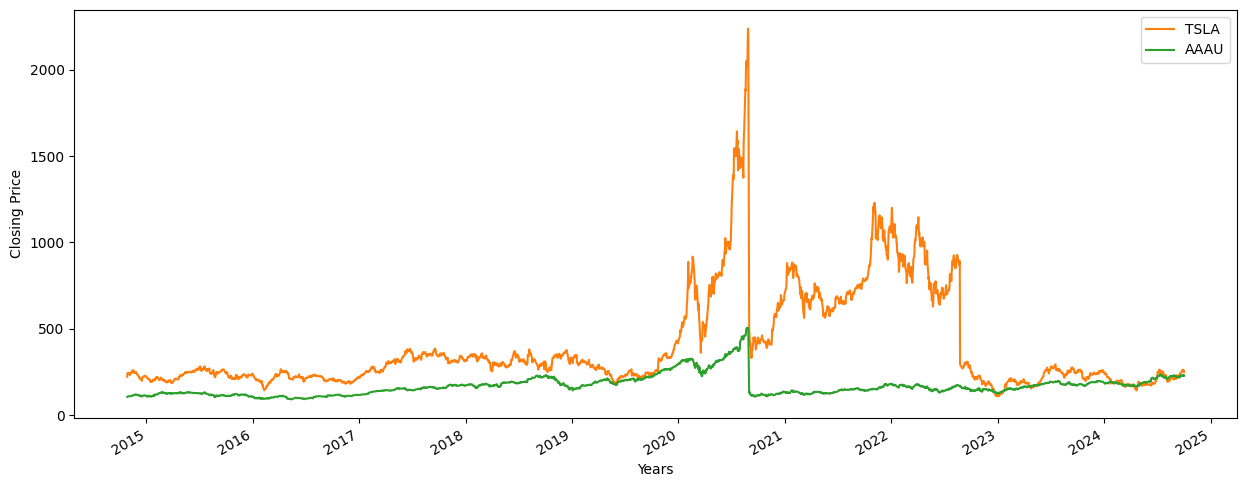

In [35]:
fig, ax = plt.subplots(figsize = (15, 6))

# Plot airbnb and AAAU closing price
df_tesla[" close"].plot(ax=ax, label="TSLA", color = "C1")
df_apple[" close"].plot(ax=ax, label="AAAU", color = "C2")

# Label axes
plt.xlabel("Years")
plt.ylabel("Closing Price")

# Add legend
plt.legend();

Calculate TESLA Stock Returns

In [36]:
# Sort Datetime ascending by date
df_tesla.sort_index(ascending=True, inplace=True)

# Create return column
df_tesla["return"] = df_tesla[" close"].pct_change() * 100

Calculate APPLE Stock Returns

In [37]:
# Sort Datetime ascending by date
df_apple.sort_index(ascending=True, inplace=True)

# Create return column
df_apple["return"] = df_apple[" close"].pct_change() * 100# Sort Datetime ascending by date

Calculate AIRBNB and Goldman Sacks Gold ETF Returns

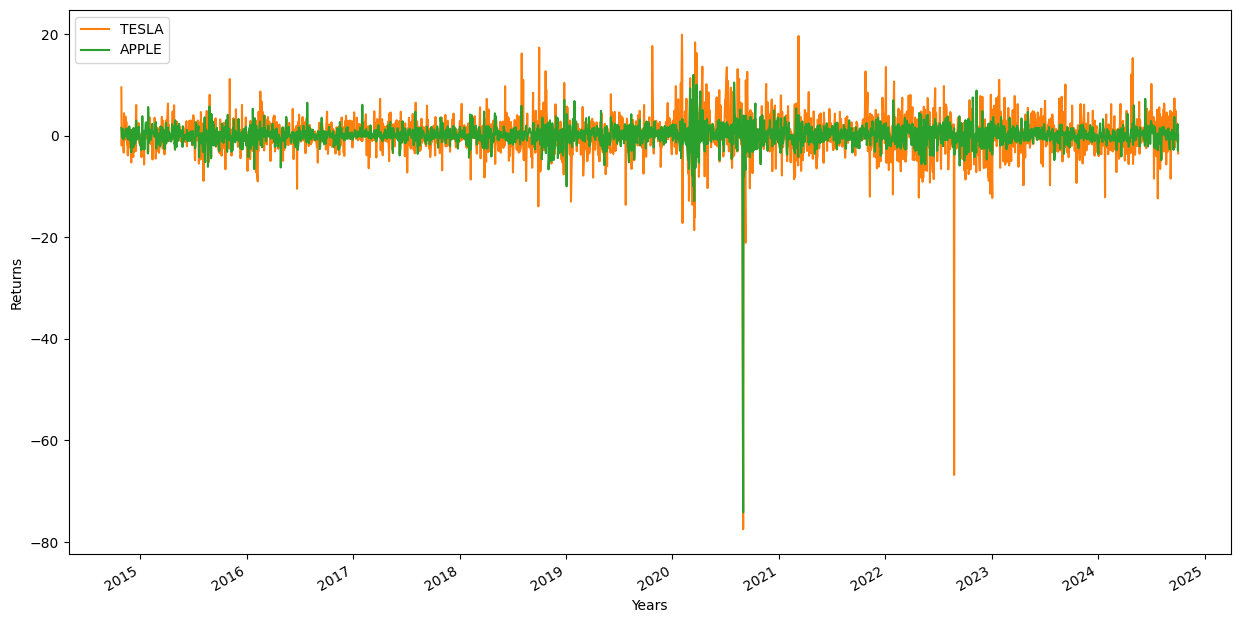

In [38]:
fig, ax = plt.subplots(figsize = (15, 8))

# Plot airbnb and AAAU closing prGarchModel(ticker="AAPL", repo=repo, use_new_data=False)ice
df_tesla["return"].plot(ax=ax, label="TESLA", color = "C1")
df_apple["return"].plot(ax=ax, label="APPLE", color = "C2")

# Label axes
plt.xlabel("Years")
plt.ylabel("Returns")

# Add legend
plt.legend();